
# Kickstarter Projects Analysis
### Phase #1 Business understanding

Kickstarter is an American public-benefit corporation based in Brooklyn, New York, that maintains a global crowdfunding platform focused on creativity and merchandising. The company's stated mission is to "help bring creative projects to life".
<br>The platform sets out to help projects gather funds for its project execution and completion, The project owners are called creators. The creators have to produce thorough study and context about his project. <br> The members of the audience who decide on funding the project are called backers and the amount they contribute is called the ‘pledged amount’. <br> Kickstarter follows an all-or-nothing funding model. What it means is that if the project does not gather funds (a total pledged amount) equal to or greater than the goal amount by the project deadline, the pledged amount(if any) is not charged from the backers and the project creators are not expected to complete the project in whatever amount that has been pledged so far. 

* Understand the marketplace of Kickstarter including timing of campaigns posted, types of projects, location of campaigns, description of campaigns and more
* Provide insight into attributes that set campaigns up for a higher rate of success to inform campaign creation in the future
* Build a predictive model that allows Kickstarter to identify high-failure-risk campaigns before they fail and provide supplemental advice and material to the creators
* Identify a business opportunity for Kickstarter by finding campaigns just below the predicted threshold of success and helping them get to their goal, helping both parties earn revenue

### Phase #2 Data Understanding


### Objective

1. What are the most successfull Kickstarter categories?

2. How does the size of Project's goal effect the success of a project?

3. What is the relationship between the size of a project and its amount of backers for both successful and failed projects?

4. Is it possible to build a model and predict chance of success for a project with this dataset?


In [5]:
#Import all the useful libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

In [9]:
#Read the csv file
df = pd.read_csv('ks-projects-201801-1.csv')

In [10]:
#Get the column names
df.columns

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged', 'usd_pledged_real', 'usd_goal_real'],
      dtype='object')

### Column description
* ID - internal kickstarter id
* Name - name of project - A project is a finite work with a clear goal that you’d like to bring to life. Think albums, books, or films.
* category - category
* main_category - category of campaign
* currency - currency used to support
* deadline - The date before which the goal amount has to be gathered
* goal fundraising goal - The funding goal is the amount of money that a creator needs to complete their project.
* launched - the date the project was launched on
* pledged amount - pledged by "crowd"
* state - Current condition the project is in - Response variable
* backers - number of backers
* country - country pledged from
* usd pledged - amount of money pledged
* Goal - amount in USD

In [4]:
#Fetch the number of rows and columns
print ('DataFrame Shape', df.shape)

DataFrame Shape (378661, 15)


In [5]:
#View the top 3 rows of data
df.head(3)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,09-10-2015,1000.0,11-08-2015 12:12,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,01-11-2017,30000.0,02-09-2017 04:43,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,26-02-2013,45000.0,12-01-2013 00:20,220.0,failed,3,US,220.0,220.0,45000.00


In [6]:
#Get info about datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


In [7]:
#Obtain summary of columns with numerical data
df.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


In [8]:
#Unique categories in each categorical variable
df.nunique()

ID                  378661
name                375722
category               159
main_category           15
currency                14
deadline              3164
goal                  8353
launched            347035
pledged              62130
state                    6
backers               3963
country                 23
usd pledged          95455
usd_pledged_real    106065
usd_goal_real        50339
dtype: int64


##### Summary of variable analysis:
There are 7 Numerical Variables  
There are 8 Categorical Variables

### Phase #3 Data Preparation


Performing some data cleaning, validation, and sanity checks before performing any analysis

In [9]:
df = df.drop(['ID', 'goal', 'pledged', 'currency', 'usd pledged'], axis=1) 

Starting by dropping columns that aren't valuable to the analysis or redundant. USD_pledged_real and USD_goal_real will be used rather than Pledged or Currency, as these are in the local country's currency

#### Missing Data

In [10]:
### Checking for missing values
df.isnull().sum()

name                4
category            0
main_category       0
deadline            0
launched            0
state               0
backers             0
country             0
usd_pledged_real    0
usd_goal_real       0
dtype: int64

Only the 'name' column seems to have missing data. With only 4 samples here, So we can drop these from the dataset.

In [11]:
##Removing missing data
df.dropna(inplace=True)

#### Dates

In [12]:
#Sort businesses from oldest to newest
df.sort_values(by='launched').head(5)

,name,category,main_category,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real
247913,"Help RIZ Make A Charity Album: 8 Songs, 8 Caus...",Music,Music,04-05-2010,01-01-1970 01:00,canceled,0,US,0.0,10000.00
48147,1st Super-Size Painting - Social Network Owned...,Art,Art,14-08-2010,01-01-1970 01:00,canceled,0,US,0.0,15000.00
273779,Identity Communications Infographic (Canceled),Design,Design,10-04-2010,01-01-1970 01:00,canceled,0,US,0.0,500.00
319002,Student Auditions Music 2015,Publishing,Publishing,31-10-2015,01-01-1970 01:00,suspended,0,CH,0.0,1905.97
94579,"Support Solo Theater! Help ""Ungrateful Daughte...",Theater,Theater,01-06-2010,01-01-1970 01:00,canceled,0,US,0.0,4000.00


In [13]:
#Convert date columns to datetime and make time delta column (Deadline - Launched) in days
df.launched = pd.to_datetime(df.launched)
df.deadline = pd.to_datetime(df.deadline)

df['timedelta'] = (df.deadline-df.launched).astype('timedelta64[h]')

In [14]:
df['timedelta'].describe()

count    378657.000000
mean        699.730302
std        2880.633644
min       -8040.000000
25%           2.000000
50%         702.000000
75%        1060.000000
max      401735.000000
Name: timedelta, dtype: float64

In [15]:
#Row numbers of projects that have timedelta of 0 - ended at the same hour of lanching
df.loc[df['timedelta'] == 0]

,name,category,main_category,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real,timedelta
331,i do it 4 oakland,Public Art,Art,2013-11-12,2013-11-11 23:17:00,successful,102,US,5080.20,4800.00,0.0
892,Colombian art gallery in LA: The Magic Realism...,Mixed Media,Art,2014-04-10,2014-04-09 23:03:00,failed,69,US,1141.50,25000.00,0.0
962,Thank You Letters from Krys,Publishing,Publishing,2014-05-12,2014-05-11 23:30:00,failed,0,US,0.00,1000.00,0.0
1157,This Song Is About You,Music,Music,2014-11-07,2014-11-06 23:35:00,failed,0,US,0.00,40000.00,0.0
1575,Brew Hampshire,Documentary,Film & Video,2014-05-07,2014-05-06 23:55:00,successful,97,US,8585.00,8000.00,0.0
2203,Taco Night,Events,Food,2014-03-10,2014-03-09 23:12:00,failed,0,US,0.00,2000.00,0.0
2347,The FLUME - Dice Tower - Dice Case - Hardwood ...,Tabletop Games,Games,2016-08-12,2016-08-11 23:51:00,successful,148,US,12730.00,1000.00,0.0
2408,CHAMPION A New Song & Music Video by Preston P...,Pop,Music,2014-11-11,2014-11-10 23:48:00,failed,17,US,2816.00,20000.00,0.0
2673,AEthermancy (Æthermancy),Tabletop Games,Games,2013-12-10,2013-12-09 23:30:00,successful,83,US,5066.72,4750.00,0.0
2748,A photographic journey into Arctic research an...,Photo,Journalism,2015-11-05,2015-11-04 23:26:00,canceled,27,US,1305.00,8000.00,0.0


It looks like there were two projects that ended within the same hour of launching. May have to calculate time delta in hours (or days) as a decimal

In [16]:
df['timedelta'] = (df.deadline-df.launched).astype('timedelta64[m]')
df['timedelta_days'] = (df['timedelta']/60)/24
df = df.drop('timedelta', axis=1)

In [17]:
df['timedelta_days'].describe()

count    378657.000000
mean         29.175890
std         120.026388
min        -334.990972
25%           0.088889
50%          29.250000
75%          44.206250
max       16738.958333
Name: timedelta_days, dtype: float64

In [18]:
#Sort by oldest to newest w.r.t timedelta_days
df.sort_values('timedelta_days', ascending=False).head(5)

,name,category,main_category,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real,timedelta_days
319002,Student Auditions Music 2015,Publishing,Publishing,2015-10-31,1970-01-01 01:00:00,suspended,0,CH,0.0,1905.97,16738.958333
273779,Identity Communications Infographic (Canceled),Design,Design,2010-10-04,1970-01-01 01:00:00,canceled,0,US,0.0,500.00,14885.958333
2842,Salt of the Earth: A Dead Sea Movie (Canceled),Film & Video,Film & Video,2010-09-15,1970-01-01 01:00:00,canceled,0,US,0.0,5000.00,14866.958333
48147,1st Super-Size Painting - Social Network Owned...,Art,Art,2010-08-14,1970-01-01 01:00:00,canceled,0,US,0.0,15000.00,14834.958333
75397,"""ICHOR"" (Canceled)",Film & Video,Film & Video,2010-05-21,1970-01-01 01:00:00,canceled,0,US,0.0,700.00,14749.958333


In [19]:
###Dropping projectss with extreme timedelta's greater than 1 year
df = df.loc[df['timedelta_days'] < 366]

#### Outliers and Distributions

To get a good understanding of the questions that are being asked, it may be necessary to remove projects with very small and large project goal's

In [20]:
#### Projects with goals below $500 and more than $10,000,000
print ('Projects with less than $500 goal: ',len(df.loc[df.usd_goal_real < 500.0]))
print ('Projects with more than $10M goal: ',len(df.loc[df.usd_goal_real > 1000000.0]))

Projects with less than $500 goal:  21774
Projects with more than $10M goal:  1080


The distribution seems to be skewed heavily to the left, with a few extremely high project goals and many small project goals. May need to scale this data for further data visualization

In [21]:
figsize = (18,6)

def histogram_plot(dataset, column, x_label, title):
    '''
    Plots histogram of input feature
    
    INPUT
    dataset = dataset with feature that is to be plotted
    column = feature of dataset to be plotted
    x_label = Label title of the x axis
    title = Plot figure title
    
    OUTPUT
    Distribution plot
    '''
    plt.figure(figsize=figsize);
    plt.hist(data = dataset, x = column, bins = bins);
    plt.xscale('log');
    plt.xticks(ticks, labels);
    plt.xlabel(x_label);
    plt.grid(False)
    plt.title(title)

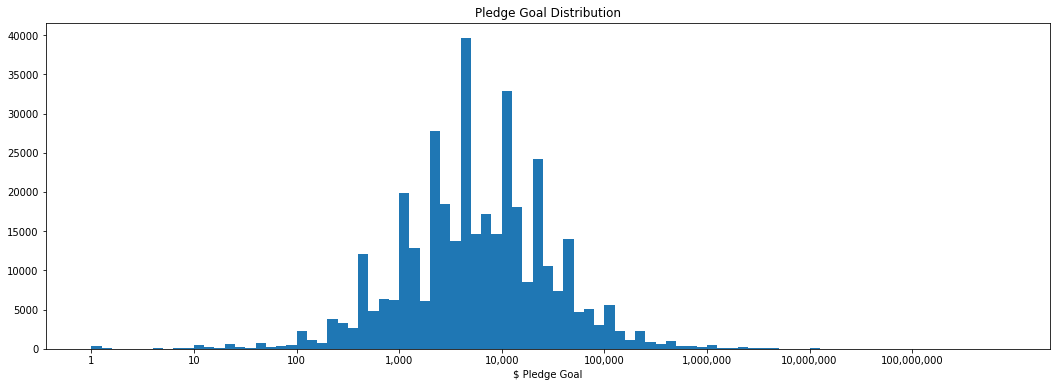

In [22]:
#USD PLEDGE GOAL DISTRIBUTION

#Selected histogram plot prameters using:(np.log10(df['usd_goal_real'].describe()))
bins = 10 ** np.arange(0, 9, .1)
ticks = [1, 10, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000]
labels = ['{:,}'.format(val) for val in ticks]

histogram_plot(df, 'usd_goal_real', '$ Pledge Goal', 'Pledge Goal Distribution')

Data scaled with Log10 to see a much cleaner and easily understood histogram of usd pledge goals. Any modeling for prediction will require these values to be scaled.

Projects with Pledge goals between 100 and 1,000,000 USD seem to be the appropriate sample for future modeling.

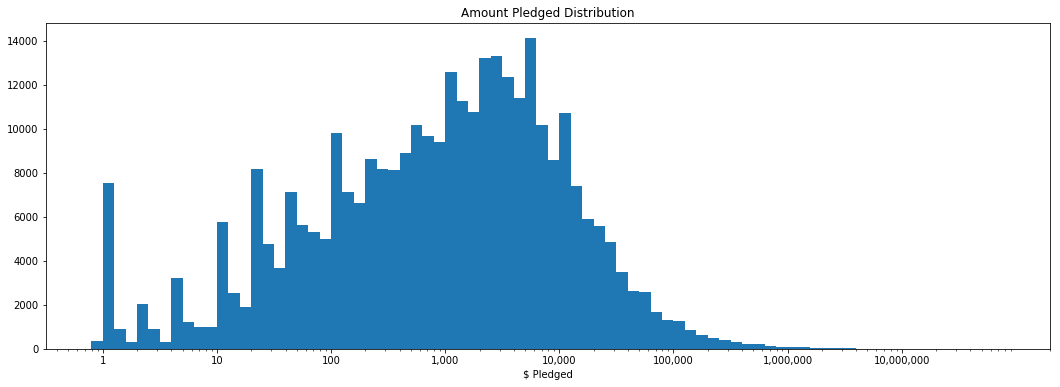

In [23]:
# USD PLEDGED DISTRIBUTION

#Selected histogram plot prameters using:(np.log10(df['usd_pledged_real'].describe()))
bins = 10 ** np.arange(-.1, 8, .1)
ticks = [1, 10, 100, 1000, 10000, 100000, 1000000, 10000000]
labels = ['{:,}'.format(val) for val in ticks]

histogram_plot(df, 'usd_pledged_real', '$ Pledged', 'Amount Pledged Distribution')

Pledge amounts seem to be slightly left skewed.

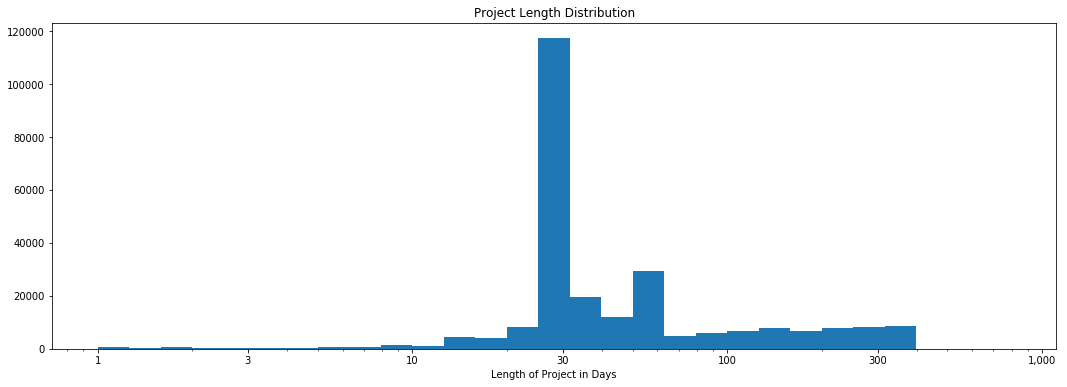

In [24]:
###Project Length Distribution

figsize = (18,6)

# Selected plot parameters using: np.log10(df['timedelta_days'].describe())
bins = 10 ** np.arange(0, 3, .1)
ticks = [1, 3, 10, 30, 100, 300, 1000]
labels = ['{:,}'.format(val) for val in ticks]

histogram_plot(df, 'timedelta_days', 'Length of Project in Days', 'Project Length Distribution')

Majority of projects have a deadline within 30 days of launch

#### Further Investigation of Outliers

In [25]:
##High Pledge Goal Projects (2.5M USD)
df.loc[df['usd_goal_real'] > 2500000].sort_values('usd_goal_real', ascending=False).head(10)

,name,category,main_category,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real,timedelta_days
47803,FUCK Potato Salad. Paleo Potato Brownies!,Food,Food,2014-08-08,2014-09-07 00:24:00,failed,0,GB,0.00,166361390.7,-30.016667
196531,A Celtic Lovestory,Drama,Film & Video,2015-11-30,2015-11-17 00:47:00,failed,0,GB,0.00,151395869.9,12.967361
367928,Hydroponic's Skyscraper(un gratte-ciel hydropo...,Technology,Technology,2015-10-24,2015-08-25 23:52:00,failed,2,FR,2.20,110169771.6,59.005556
222208,DER NEANDERTALER (Kinofilm mit Starbesetzung i...,Movie Theaters,Film & Video,2017-03-14,2017-01-13 20:08:00,failed,2,DE,38.65,107369867.7,59.161111
226161,Kitchen from Austria in Switzerland,Restaurants,Food,2015-05-10,2015-06-08 19:12:00,failed,0,CH,0.00,104057189.8,-29.800000
77676,Bring back Pontiac,Technology,Technology,2016-01-04,2016-01-02 13:39:00,failed,2,US,2.00,100000000.0,1.431250
371478,"""PG"" Reanimated Cartoons Tha Movie",Animation,Film & Video,2015-11-04,2015-10-02 23:49:00,failed,0,US,0.00,100000000.0,32.007639
281020,The Scariest Movie Ever Created,Horror,Film & Video,2015-08-22,2015-07-23 21:44:00,failed,1,US,1.00,100000000.0,29.094444
72775,Art Is Fabulous,Art,Art,2016-05-06,2016-06-04 02:55:00,failed,2,US,115.00,100000000.0,-29.121528
259186,UniqueTrends,Apparel,Fashion,2015-04-03,2015-02-02 23:52:00,failed,1,US,1.00,100000000.0,59.005556


Once again, may need to remove these rows when training a model to possibly predict chance of success. The pledge goals are unrealistic and will hurt the gernalization of our model

In [26]:
##USD Pledge goal
df.loc[df['usd_pledged_real'] > 10000000].sort_values('usd_pledged_real',
                                                      ascending=False)

,name,category,main_category,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real,timedelta_days
157270,"Pebble Time - Awesome Smartwatch, No Compromises",Product Design,Design,2015-03-28,2015-02-24 15:44:00,successful,78471,US,20338986.27,500000.0,31.344444
250254,COOLEST COOLER: 21st Century Cooler that's Act...,Product Design,Design,2014-08-30,2014-08-07 10:14:00,successful,62642,US,13285226.36,50000.0,22.573611
216629,"Pebble 2, Time 2 + All-New Pebble Core",Product Design,Design,2016-06-30,2016-05-24 15:49:00,successful,66673,US,12779843.49,1000000.0,36.340972
289915,Kingdom Death: Monster 1.5,Tabletop Games,Games,2017-08-01,2016-11-25 06:01:00,successful,19264,US,12393139.69,100000.0,248.749306
282416,Pebble: E-Paper Watch for iPhone and Android,Product Design,Design,2012-05-19,2012-11-04 06:59:00,successful,68929,US,10266845.74,100000.0,-169.290972


#### Data Preparation Conclusion

Now that the data has been reviewed and cleaned up a bit, we can better answer these questions. we will keep some of the questionable 'outlier' projects for now, but may remove them when training a model in order to help generalize better.


#### Analysis - Finding Answers

What are the most popular and/or successfull Kickstarter categories?

In [26]:
print ('Unique Categories: ',df.category.nunique())
print ('Unique Main Categories: ', df.main_category.nunique())

Unique Categories:  159
Unique Main Categories:  15


### % of total projects = # of projects in main category / total rows
### % of success = # of projects with state ="successful" / total rows

In [27]:
# % of projects per main category
df.main_category.value_counts()/(len(df))*100

Film & Video    16.789627
Music           13.707349
Publishing      10.532553
Games            9.305155
Technology       8.593636
Design           7.932750
Art              7.443647
Food             6.500699
Fashion          6.027501
Theater          2.882660
Comics           2.859332
Photography      2.846607
Crafts           2.328078
Journalism       1.255497
Dance            0.994907
Name: main_category, dtype: float64

In [28]:
# % of successful projects per main category
(df.main_category.loc[df['state'] == 'successful'].value_counts()/(len(df)))*100

Music           6.385647
Film & Video    6.236397
Games           3.309201
Publishing      3.247698
Art             3.045430
Design          2.785370
Theater         1.726309
Technology      1.697944
Food            1.608076
Comics          1.544718
Fashion         1.475793
Photography     0.872698
Dance           0.617410
Crafts          0.559884
Journalism      0.267217
Name: main_category, dtype: float64

In [29]:
#BUild a dataframe with % of projects and % of sucessful businesses in each main category
# sorted descending by projects per category
success_perc = pd.DataFrame(data={
            'Count':df.main_category.value_counts(),
            '% of Total Projects': (df.main_category.value_counts()/(len(df))*100),
            '% of Success': (df.main_category.loc[df['state'] == 'successful']
                             .value_counts()/(len(df))*100)
            }).sort_values('Count', ascending=False)
success_perc

,% of Success,% of Total Projects,Count
Film & Video,6.236397,16.789627,63334
Music,6.385647,13.707349,51707
Publishing,3.247698,10.532553,39731
Games,3.309201,9.305155,35101
Technology,1.697944,8.593636,32417
Design,2.785370,7.932750,29924
Art,3.045430,7.443647,28079
Food,1.608076,6.500699,24522
Fashion,1.475793,6.027501,22737
Theater,1.726309,2.882660,10874


In [30]:
#how to convert index to column
success_perc.reset_index(level=0, inplace=True)


In [31]:
success_perc = success_perc.sort_values('% of Success', ascending=False)
success_perc

,index,% of Success,% of Total Projects,Count
1,Music,6.385647,13.707349,51707
0,Film & Video,6.236397,16.789627,63334
3,Games,3.309201,9.305155,35101
2,Publishing,3.247698,10.532553,39731
6,Art,3.045430,7.443647,28079
5,Design,2.785370,7.932750,29924
9,Theater,1.726309,2.882660,10874
4,Technology,1.697944,8.593636,32417
7,Food,1.608076,6.500699,24522
10,Comics,1.544718,2.859332,10786


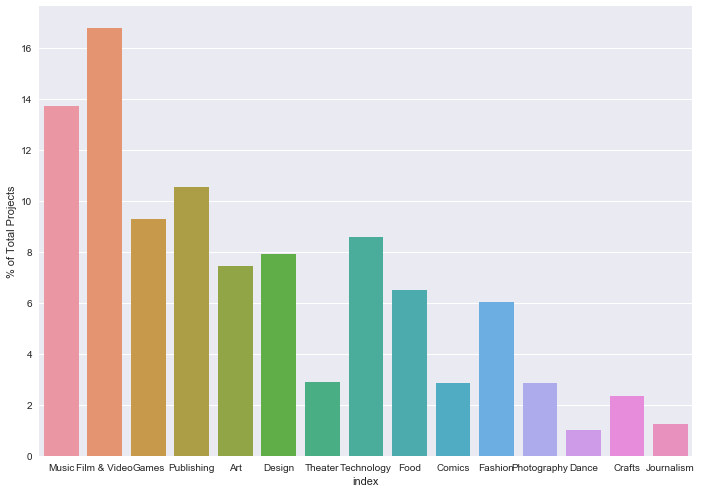

In [33]:
#Barplot of % of projects per category
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='index', y='% of Total Projects', data=success_perc)

It seems there is a correlation between how popular a category is, and its rate of success

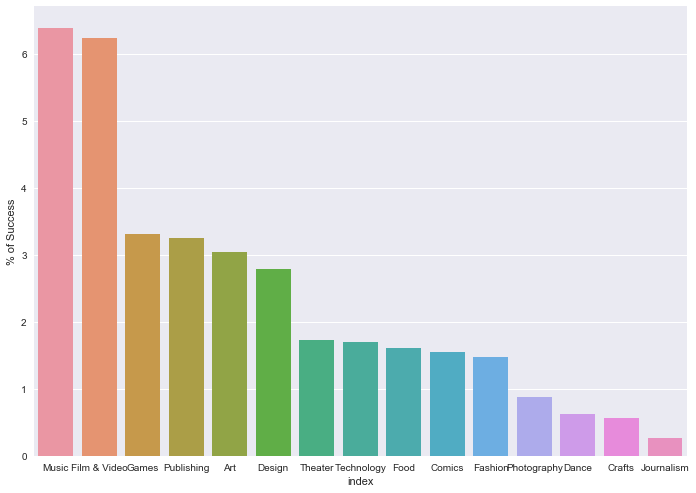

In [34]:
#Barplot of % success per category
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='index', y='% of Success', data=success_perc)

The most popular categories in this dataset are are Film & Radio and Music. There is also an undefined state for project status.

What are the success rates of projects of different pledge goal sizes?

In [35]:
##Dropping projects with undefined and live states
df = df.loc[df.state != 'undefined']
df = df.loc[df.state != 'live']

In [36]:
#Creating Bin columns for project size
df['bin'] = pd.cut(df['usd_goal_real'],
                   [1, 1000, 10000, 100000, 1000000, 1000000000],
                   labels=['Less than 1000',
                           '1,000 to 10,000',
                           '10,000 to 100,000', 
                           '100,000 to 1,000,000',
                           'Greater than 1,000,000'])

In [37]:
df['bin'].value_counts()

1,000 to 10,000           187815
10,000 to 100,000         110359
Less than 1000             59962
100,000 to 1,000,000       11454
Greater than 1,000,000      1072
Name: bin, dtype: int64

In [38]:
#Group success % by bins
#BUild a dataframe with % of projects and % of sucessful businesses in each main category
# sorted descending by projects per category
success_perc_bin = pd.DataFrame(data={
            'Count':df.bin.value_counts(),
            '% of Total Projects': (df.bin.value_counts()/(len(df))*100),
            '% of Success': (df.bin.loc[df['state'] == 'successful']
                             .value_counts()/(len(df))*100)
            }).sort_values('Count', ascending=False)
success_perc_bin

,% of Success,% of Total Projects,Count
"1,000 to 10,000",20.346658,50.620032,187815
"10,000 to 100,000",7.399961,29.744036,110359
Less than 1000,7.953017,16.161001,59962
"100,000 to 1,000,000",0.194594,3.087090,11454
"Greater than 1,000,000",0.002965,0.288926,1072


At first glance, it looks like the smaller projects seem to be more successful, as expected.

What is the average pledged by each backer for successful and failed projects?

In [39]:
#groupby state for pledged
pledged_per_state = df.groupby('state')['usd_pledged_real'].mean()
pledged_per_state = pledged_per_state.sort_values(ascending=False)
pledged_per_state

state
successful    22664.498532
suspended      9351.992772
canceled       2339.936090
failed         1318.548372
Name: usd_pledged_real, dtype: float64

### Phase #4 Modeling & #5 Evaluation


Can we predict the success of a project?

In [40]:
model_df = df.copy()

In [41]:
model_df['state'].value_counts()

failed        197130
successful    133460
canceled       38603
suspended       1836
Name: state, dtype: int64

In [42]:
##Dropping some columns before training model

#cannot usd backers as a feature here. Since we do not know the backers of a project at the creation
#of one.
#model_df = model_df.drop(['name', 'deadline', 'launched', 'backers', 'bin'], axis=1)

model_df = model_df.drop(['name', 'deadline', 'launched', 'bin', 'category'], axis=1)
model_df.columns

Index(['main_category', 'state', 'backers', 'country', 'usd_pledged_real',
       'usd_goal_real', 'timedelta_days'],
      dtype='object')

Last minute data cleaning for training

In [43]:
##Dropping state of undefined projects, since this is going to be our target variable
model_df = model_df.loc[df['state'] != 'undefined']
model_df['state'].value_counts()

failed        197130
successful    133460
canceled       38603
suspended       1836
Name: state, dtype: int64

Dealing with categorical variables

In [44]:
#Formatting target variable to 1(successful) and 0(not successful)
model_df.state.replace(['successful', 'failed', 'canceled', 'suspended'], [1, 0, 0, 0], inplace=True)

In [45]:
model_df['state'].value_counts()

0    237569
1    133460
Name: state, dtype: int64

In [46]:

model_df.columns

Index(['main_category', 'state', 'backers', 'country', 'usd_pledged_real',
       'usd_goal_real', 'timedelta_days'],
      dtype='object')

Preprocessing Data

In [47]:
#X and Y variables
X  =  model_df.drop(['state'], axis=1)
y  =  model_df[['state']]

print(X.shape)
print(y.shape)

(371029, 6)
(371029, 1)


In [48]:
#Convert categorical vriables to dummy variables
X = pd.get_dummies(X, drop_first=True)

In [50]:
X.columns

Index(['backers', 'usd_pledged_real', 'usd_goal_real', 'timedelta_days',
       'main_category_Comics', 'main_category_Crafts', 'main_category_Dance',
       'main_category_Design', 'main_category_Fashion',
       'main_category_Film & Video', 'main_category_Food',
       'main_category_Games', 'main_category_Journalism',
       'main_category_Music', 'main_category_Photography',
       'main_category_Publishing', 'main_category_Technology',
       'main_category_Theater', 'country_AU', 'country_BE', 'country_CA',
       'country_CH', 'country_DE', 'country_DK', 'country_ES', 'country_FR',
       'country_GB', 'country_HK', 'country_IE', 'country_IT', 'country_JP',
       'country_LU', 'country_MX', 'country_N,0"', 'country_NL', 'country_NO',
       'country_NZ', 'country_SE', 'country_SG', 'country_US'],
      dtype='object')

In [51]:
##Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(259720, 40) (259720, 1)
(111309, 40) (111309, 1)


In [ ]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
skm = log.fit(X_train,y_train)
# log.summary()